In [1]:
import numpy as np 
import pandas as pd 
import re
import nltk 
import matplotlib.pyplot as plt
%matplotlib inline

import os
import sys
import numpy
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import metrics
from sklearn.datasets import load_files
from sklearn.model_selection import train_test_split

In [2]:
donaldtrump_tweets = pd.read_csv('datatrain1.csv')

In [3]:
donaldtrump_tweets.head()

Unnamed: 0                                               text  \
0           0  trump is fragile  he can t hear anything that ...   
1           1  you need  tutoring  my child  i was paying you...   
2           2           vas presa pronto o el pueblo los linchan   
3           3                                      he s a joke     
4           4  what about you giving ppl respect  i m sick of...   

                        positive         negative  positive_count  \
0  glowing endorsement greatness  fragile falling               3   
1                        respect         tutoring               1   
2                            NaN              NaN               0   
3                            NaN             joke               0   
4                        respect             sick               1   

   negative_count  score sentiment  total  
0               2      1  positive      1  
1               1      0   neutral      1  
2               0      0   neutral      1  
3               1     -1  negative      1  
4               1      0   neutral      1

In [49]:
features = donaldtrump_tweets.iloc[:, 2].values
labels = donaldtrump_tweets.iloc[:, 7].values

In [50]:
df= donaldtrump_tweets
processed_features = df.text.fillna(' ')

In [51]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(max_features=2500, min_df=7, max_df=0.8)
processed_features = vectorizer.fit_transform(processed_features).toarray()

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(processed_features, labels, test_size=0.2, random_state=0)

In [53]:
from sklearn.ensemble import RandomForestClassifier

text_classifier = RandomForestClassifier(n_estimators=200, random_state=0)
text_classifier.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [45]:
predictions = text_classifier.predict(X_test)

In [46]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
print(accuracy_score(y_test, predictions))

[[775 113  11]
 [195 497  37]
 [155  61 157]]
              precision    recall  f1-score   support

    negative       0.69      0.86      0.77       899
     neutral       0.74      0.68      0.71       729
    positive       0.77      0.42      0.54       373

    accuracy                           0.71      2001
   macro avg       0.73      0.65      0.67      2001
weighted avg       0.72      0.71      0.70      2001

0.7141429285357321


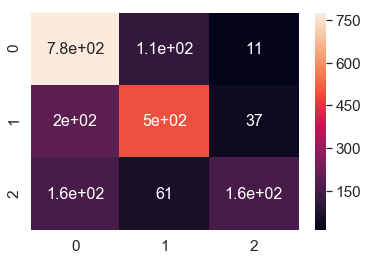

In [22]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
cm = (confusion_matrix(y_test,predictions))        
df_cm = pd.DataFrame(cm, range(3),
                  range(3))
#plt.figure(figsize = (10,7))

plt.ylabel('Actual')
plt.xlabel('Predicted')

sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, annot=True,annot_kws={"size": 16})# font size

In [29]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_test, predictions, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_test, predictions)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_test, predictions)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax


np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plot_confusion_matrix(y_test, predictions, classes,
                      title='Confusion matrix, without normalization')

# Plot normalized confusion matrix
plot_confusion_matrix(y_test, predictions, classes, normalize=True,
                      title='Normalized confusion matrix')

plt.show()

NameError: name 'classes' is not defined

In [30]:
y_test.value_counts()

AttributeError: 'numpy.ndarray' object has no attribute 'value_counts'